<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


In [ ]:
The chance of the knight crossing the bridge safely is 0.60

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

No, I do not agree with him because by capturing a troll, he has eliminated the possibility of GGGGG being under the bridge. As a result, the only other possibilities under the bridge are TTGGG or TGGGG. Between these, there is still a large chance of him being clobbered, so he has actually drastically increased his chances of being clobbered. 

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

Since a troll was captured, that means the possibility of GGGGG (E3) being under the bridge cannot be. This leaves the other events E1 and E2 as the two events that need to be considered. 

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

In [2]:
# P(C|E1) = 0.4; the probability of finding a troll in bridge 1 (TTGGG)
# P(C|E2) = 0.2; the probability of finding a troll in bridge 2 (TGGGG)
# P(C|E3) = 0.0; the probability of finding a troll in bridge 3 (GGGGG)
# P(C) = 0.12; the weighted sum of P(C|E#) => (0.2*0.4 + 0.2*0.2 + 0.6*0.0)/(0.2 + 0.2 + 0.6) = 0.12
# P(E1|C) = [P(C|E1)*P(E1)]/P(C)

P_C_E1 = 0.4
P_E1 = 0.2
P_C = 0.12
P_E1_C = (P_C_E1*P_E1)/P_C

0.6666666666666669

Probability of the other event given a troll captured: 

In [3]:
P_E2 = 0.2
P_C_E2 = 0.2
P_E2_C = (P_C_E2*P_E2)/P_C

0.3333333333333334

### 1.5

#### What is the chance of the knight crossing safely?

In [4]:
# The chance of the knight crossing safely is if E2 occurs, after he has captured a troll
# Thus, the chance of hte knight crossing safely is 1/3 or 33.3%

P_E2_C = (P_C_E2*P_E2)/P_C

0.3333333333333334

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [42]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

   Resolving package versions...
  No Changes to `C:\Users\ahsra\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\ahsra\.julia\environments\v1.8\Manifest.toml`


In [55]:
import Distributions as di
import Plots
import Polynomials
import Random
using Random
using Plots
using Distributions
using Polynomials: Polynomial, fit, coeffs

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [23]:
x = -10:1:10
y_true = x.^2 + 3 .* x .- 2

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [38]:
data_error = 10
noise = di.Normal(0, data_error)
y_observed = y_true .+ rand(noise, length(x))

21-element Vector{Float64}:
  81.01498353060359
  52.397893217926004
  55.574581329691334
  36.939288135209075
  20.95236716270568
   8.452495697405729
  -3.6904142864005003
   2.7787496659810094
  -9.352688723212813
 -14.064017488503225
 -20.773749340135712
   7.2970325685929245
   6.933395923309578
  16.03666377942591
  36.27164440438312
  40.66712886246625
  40.0557333881287
  73.02925016671271
  94.35133341686175
 116.86187237288314
 127.36559769384182

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

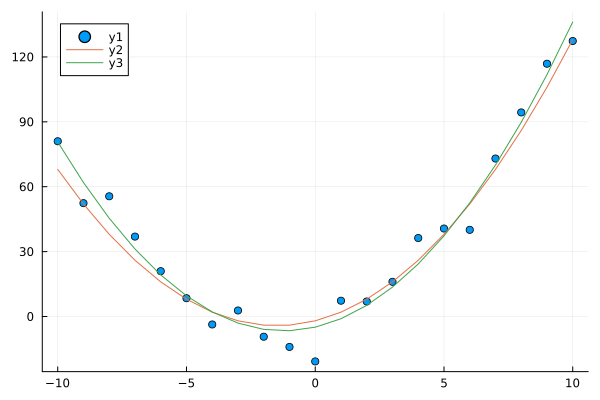

In [62]:
scatter(x, y_observed)
plot!(x, y_true)
line_fit = fit(x, y_observed, 2)
typeof(line_fit)
fit_coeff = coeffs(line_fit)
y_fitted = fit_coeff[1] .+ fit_coeff[2] .* x .+ fit_coeff[3] .* x.^2
plot!(x, y_fitted)

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

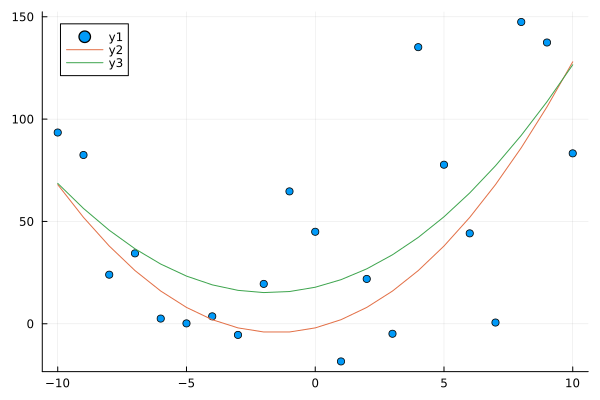

In [72]:
x = -10:1:10
data_error_fifty = 50
noise_fifty = di.Normal(0, data_error_fifty)
y_observed_fifty = y_true .+ rand(noise_fifty, length(x))
scatter(x, y_observed_fifty)
plot!(x, y_true)
line_fit_fifty = fit(x, y_observed_fifty, 2)
typeof(line_fit_fifty)
fit_coeff_fifty = coeffs(line_fit_fifty)
y_fitted_fifty = fit_coeff_fifty[1] .+ fit_coeff_fifty[2] .* x .+ fit_coeff_fifty[3] .* x.^2
plot!(x, y_fitted_fifty)

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

Compared to the plot from 2.3, this is definitely a worse fit. This fit is clearly not closer to y_true because the standard deviation of the Gaussian distribution is higher, adding more noise into the observed plot, skewing the fitted polynomial.

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


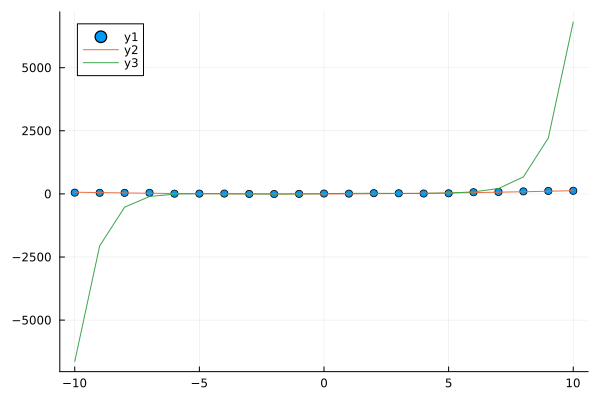

In [74]:
y_true = x.^2 + 3 .* x .- 2
data_error_tenth = 10
noise_tenth = di.Normal(0, data_error_tenth)
y_observed_tenth = y_true .+ rand(noise_tenth, length(x))
scatter(x, y_observed_tenth)
plot!(x, y_true)
line_fit_tenth = fit(x, y_observed_tenth, 11)
typeof(line_fit_tenth)
fit_coeff_tenth = coeffs(line_fit_tenth)
y_fitted_tenth = fit_coeff_tenth[1] .+ fit_coeff_tenth[2] .* x .+ fit_coeff_tenth[3] .* x.^2 .+ fit_coeff_tenth[4] .* x.^3 .+ fit_coeff_tenth[5] .* x.^4 .+ fit_coeff_tenth[6] .* x.^5 .+ fit_coeff_tenth[7] .* x.^6 .+ fit_coeff_tenth[8] .* x.^7 .+ fit_coeff_tenth[9] .* x.^8 .+ fit_coeff_tenth[10] .* x.^9 .+ fit_coeff_tenth[11] .* x.^10
plot!(x, y_fitted_tenth)

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


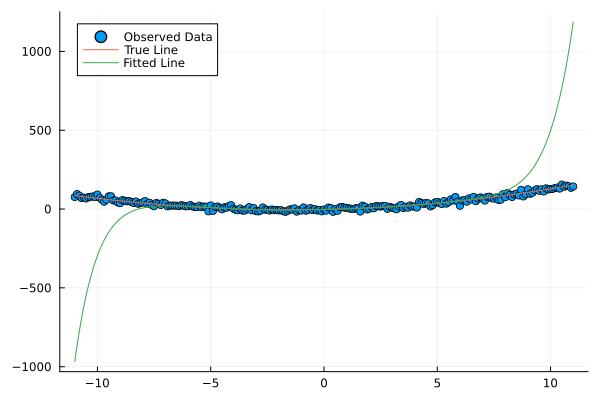

In [101]:
x_fit = -11:0.1:11
y_true_x_fit = x_fit.^2 + 3 .* x_fit .- 2
y_observed_x_fit = y_true_x_fit .+ rand(noise, length(x_fit))
scatter(x_fit, y_observed_x_fit, label = "Observed Data")
plot!(x_fit, y_true_x_fit, label = "True Line")
line_fit_x_fit = fit(x_fit, y_observed_x_fit, 11)
typeof(line_fit_x_fit)
fit_coeff_x_fit = coeffs(line_fit_x_fit)
y_fitted_x_fit = fit_coeff_x_fit[1] .+ fit_coeff_x_fit[2] .* x_fit .+ fit_coeff_x_fit[3] .* x_fit.^2 .+ fit_coeff_x_fit[4] .* x_fit.^3 .+ fit_coeff_x_fit[5] .* x_fit.^4 .+ fit_coeff_x_fit[6] .* x_fit.^5 .+ fit_coeff_x_fit[7] .* x_fit.^6 .+ fit_coeff_x_fit[8] .* x_fit.^7 .+ fit_coeff_x_fit[9] .* x_fit.^8 .+ fit_coeff_x_fit[10] .* x_fit.^9 .+ fit_coeff_x_fit[11] .* x_fit.^10
plot!(x_fit, y_fitted_x_fit, label = "Fitted Line")


3. What do you observe in the plot? What is this phenomenon called?

By applying the tenth order polynomial to x_fit, we see a phenomenon known as overfitting. 